In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
#Random Points
x=[]
y=[]
z=[]
for i in range(0,100):
    n=random.randint(1,1000)
    x.append(n)
    n=random.randint(1,1000)
    y.append(n)
    n=random.randint(1,1000)
    z.append(n)
points=[]
for i in range(0,100):
   #print(x[i],y[i],z[i])
    points.append([x[i],y[i],z[i]])
_points=np.asarray(points,dtype=np.int32)
print(_points)

[[  5 644 436]
 [687 776 806]
 [166 398 302]
 [150 582 839]
 [266 553 838]
 [615 489 682]
 [784 358  51]
 [780 267 411]
 [755 428 221]
 [496 891 883]
 [114 797 117]
 [ 74 967 368]
 [470 449 858]
 [124 889 315]
 [550  44  71]
 [257 928  73]
 [ 10 848  11]
 [573  19 818]
 [806  88 240]
 [292 213 313]
 [303 473 939]
 [111 471 145]
 [339 943 850]
 [776 744 989]
 [952 126 685]
 [385 173 226]
 [877 383 995]
 [876 799 940]
 [874 441 394]
 [723 844 477]
 [188 475 495]
 [344 446 956]
 [498 788  93]
 [ 91 991 461]
 [420 542 715]
 [524 401 104]
 [824 425 998]
 [ 88 895 833]
 [757 988 117]
 [206 908 897]
 [257 778 564]
 [603 233 985]
 [843 783 491]
 [365 153 571]
 [235  76 465]
 [819 768 705]
 [596 123 210]
 [ 69 240 412]
 [820 217 474]
 [175 381 824]
 [591 913  32]
 [810  13 475]
 [313 989 399]
 [380 948  51]
 [ 78 258 666]
 [104 757 186]
 [737 990 194]
 [131 549 112]
 [340 827   4]
 [221 530 655]
 [695  68 828]
 [789 104 515]
 [ 78 438 121]
 [166 382 272]
 [431 943 290]
 [730  83 166]
 [504 370 

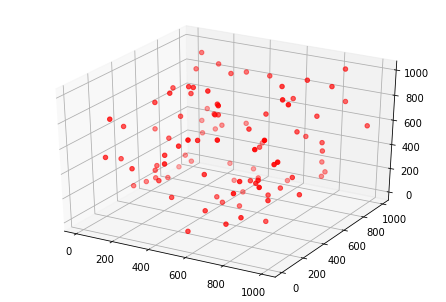

In [3]:
#plotting points
figure=plt.figure()
axis=Axes3D(figure)
axis.scatter(x,y,z,c='r')

In [4]:
def BinarySplit(dataPoints,k):
    #ep=np.array([0.01,0.01,0.01],dtype=np.float)
    ep=0.01
    bcenters=[]
    bClusters={}
    cluster,center=KmeansFunction(dataPoints,1)
    temp=[center[0]]
    n=0
    #print(temp)
    #print(np.append(temp-ep,temp+ep))
    while(len(cluster)<k):
        #print("loop start")
        epValues=[]
        #print(temp,n,2**n)
        i=0
        while(i<2**n):
            #print(i,temp[i])
            epValues.append([j-ep for j in temp[i]])
            epValues.append([j+ep for j in temp[i]])
            i+=1
        #print(epValues)
        cluster,temp=KmeansGivenPoints(dataPoints,epValues)
        n+=1
    return(cluster,temp)

In [6]:
# clu,cent=BinarySplit(_points,6)
# print(clu)
# print(cent)

# figure=plt.figure()
# axis=Axes3D(figure)
# color=['red','green','blue','black','cyan','grey','purple','brown','pink','white']
# for i in range(0,len(cent)):
#     axis.scatter(cent[i][0],cent[i][1],cent[i][2],marker='x',color=color[i])
#     for p in clu[i]:
#         axis.scatter(p[0],p[1],p[2],c=color[i])

In [7]:
def KmeansFunction(dataPoints,k):
        kclusters={}
        kcentroids={}
        n_iter=20
        for i in range(k):
            kcentroids[i]=dataPoints[i]
        for i in range(0,n_iter):
            for j in range(k):
                kclusters[j]=[]
            for points in dataPoints:
                dist=[]
                for m in range(0,k):
                    dist.append(math.sqrt((points[0]-kcentroids[m][0])**2+(points[1]-kcentroids[m][1])**2+(points[2]-kcentroids[m][2])**2))
                kclusters[dist.index(min(dist))].append(points)               
            for l in range(k):
                kcentroids[l]=np.average(kclusters[l],axis=0)
        return(kclusters,kcentroids)
    
def KmeansGivenPoints(dataPoints,cen):
    kclusters={}
    kcentroids={}
    #print("data")
    #print(dataPoints)
    #print("centroids")
    for i in range(len(cen)):
        #print(cen[i])
        kcentroids[i]=cen[i]#error point
    for i in range(0,20):
        for j in range(0,len(cen)):
            kclusters[j]=[]
        for points in dataPoints:
            dist=[]
            for m in range(0,len(cen)):
                #print(points)
                #print(m,kcentroids[m][0],kcentroids[m][1],kcentroids[m][2])
                dist.append(math.sqrt((points[0]-kcentroids[m][0])**2+(points[1]-kcentroids[m][1])**2+(points[2]-kcentroids[m][2])**2))
            kclusters[dist.index(min(dist))].append(points)
        for l in range(len(cen)):
                kcentroids[l]=np.average(kclusters[l],axis=0)
    center=[]
    for i in range(len(cen)):
            center.append(kcentroids[i])
    return(kclusters,center)

{0: array([294.19354839, 739.90322581, 204.51612903]), 1: array([544.        , 654.57142857, 807.97142857]), 2: array([623.35294118, 171.94117647, 478.02941176])}


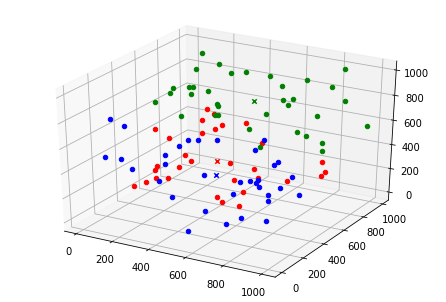

In [8]:
cluster,centers=KmeansFunction(_points,3)
print(centers)
figure=plt.figure()
axis=Axes3D(figure)
color=['red','green','blue','black','cyan','grey','purple','brown']
for i in range(0,len(centers)):
    axis.scatter(centers[i][0],centers[i][1],centers[i][2],marker='x',c=color[i])
    for p in cluster[i]:
        axis.scatter(p[0],p[1],p[2],c=color[i])